Train shape: (105, 9)
Eval shape: (25, 9)
Training XGBoost...

XGBoost Performance on Eval Set:
MAE:  1.8265 degrees
RMSE: 2.3292 degrees
R²:   0.6923


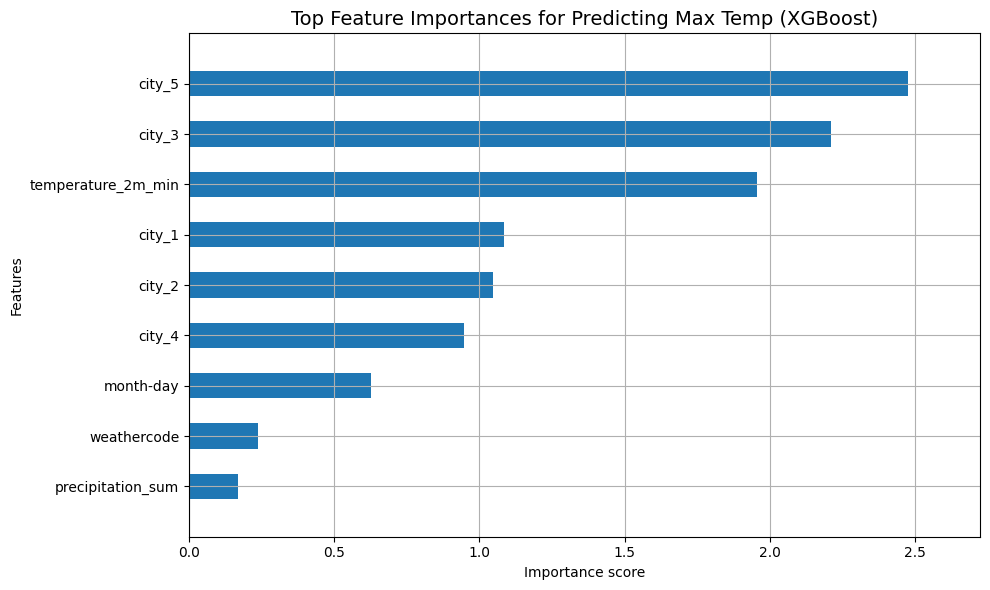

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor, plot_importance

train_df = pd.read_csv("data/processed/train_encoded.csv", index_col="time", parse_dates=True)
eval_df = pd.read_csv("data/processed/eval_encoded.csv", index_col="time", parse_dates=True)

train_df['precipitation_sum'] = train_df['precipitation_sum'].fillna(0)
eval_df['precipitation_sum'] = eval_df['precipitation_sum'].fillna(0)


target = "temperature_2m_max"

X_train = train_df.drop(columns=[target])
y_train = train_df[target]

X_eval = eval_df.drop(columns=[target])
y_eval = eval_df[target]

print("Train shape:", X_train.shape)
print("Eval shape:", X_eval.shape)


xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

print("Training XGBoost...")
xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_eval)
mae = mean_absolute_error(y_eval, y_pred)
rmse = np.sqrt(mean_squared_error(y_eval, y_pred))
r2 = r2_score(y_eval, y_pred)

print("\nXGBoost Performance on Eval Set:")
print(f"MAE:  {mae:,.4f} degrees")
print(f"RMSE: {rmse:,.4f} degrees")
print(f"R²:   {r2:.4f}")


plt.rcParams['figure.figsize'] = [10, 6] 
plot_importance(
    xgb_model,
    importance_type="gain",
    max_num_features=20,
    height=0.5,
    show_values=False
)
plt.title("Top Feature Importances for Predicting Max Temp (XGBoost)", fontsize=14)
plt.tight_layout()
plt.show()